Found 10 merged spec files.

Exploring: 03.fits


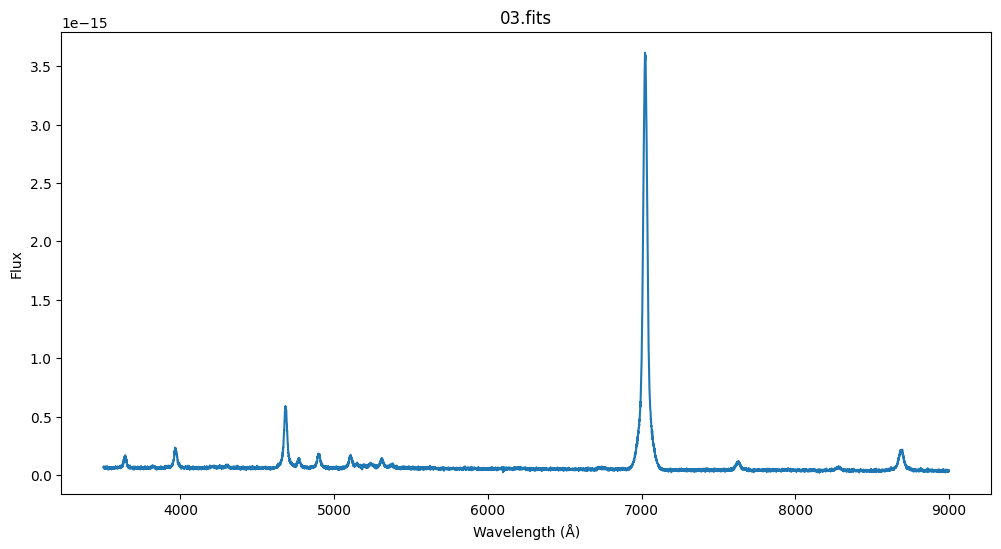


Identified Lines Summary:
  No lines were identified interactively.


In [2]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

# --- Spectroscopy ---
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"
# --- Merged spec files ---
merged_spec_files = [f for f in os.listdir(wd) if f.endswith('.fits') and not f.startswith('spec_')]
merged_spec_files.sort()


# --- Load Table 3 from Appendix C ---
data = {
    'Line ID': ['H I (He)', 'He I', 'H I (Hd)', 'He I', 'Fe II (28)', 'C III', 'He II', 'Fe II (27)', 'C III', 'Fe II (28)', 'Fe II (27)', 'H I (Hy)','Fe II (27)','Fe II (27)','He I','Fe II (27)','He I','He I','Fe II (37)','Fe II (38)','Fe II (37)','N III (3)','Fe II (38)','He II','Fe II (38)','Fe II (37)','Fe II (38)','N V (1)','Fe II (37)','N III','He II','He I','H I (Hb)','He I','Fe II (42)','N V (1)','N II (24)','He I','Fe II (42)','He I','Fe II (42)','Fe II (49)','Fe II (49)','Fe II (48)','O VI (1)','Fe II (48)','He II','Fe II (49, 48)','N II (29)','Fe II (55)','N II (3)','He I','Na I (D2)','Na I (D1)','N II (28)','Si II (4)','Si II (4)','Fe II (46)','Fe II (46)','Fe II (74)','Fe II (74)','He II','Si II (2)','Si II (2)','Fe II (74)','Fe II (74)','N II (8)','H I (Ha)','He I','He II','O I (21)','He I','He II','Fe II (73)','N I (3)','Fe II (73)','O I (55)','He II','N IV','Fe II (73)','O I (1)','N I'],
    'λ [Å] Spectral Class': [3970,4026,4102,4144,4179,4187,4200,4233,4267,4297,4303,4340,4352,4385,4388,4417,4438,4471,4491,4508,4515,4517,4523,4542,4549,4556,4584,4609,4629,4638,4686,4713,4861,4922,4924,4945,5001,5016,5018,5048,5169,5198,5235,5265,5276,5292,5317,5363,5412,5425,5479,5535,5679,5876,5890,5896,5938,5958,5979,5991,6084,6148,6248,6311,6347,6371,6417,6456,6482,6563,6678,6683,6891,7002,7065,7178,7281,7308,7452,7462,7477,7593,7703,7712,7773,7904],
    'Line ID.1': ['x','x','x','','x','','x','x','x','x','x','x','x','x','','x','','x','x','x','x','x','x','x','x','x','x','x','x','','x','x','x','x','x','x','x','x','x','','x','x','x','x','x','','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','',''],
    'λ [Å] Spectral Class.1': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
    'Line ID.2': ['Fe II','He/N','Fe II','He/N','Fe II','He/N','He/N','Fe II','He/N','Fe II','Fe II','He/N','Fe II','Fe II','He/N','Fe II','He/N','He/N','Fe II','Fe II','Fe II','He/N','Fe II','He/N','Fe II','Fe II','Fe II','He/N','Fe II','He/N','He/N','He/N','He/N','He/N','Fe II','He/N','He/N','He/N','Fe II','He/N','Fe II','Fe II','Fe II','Fe II','He/N','Fe II','He/N','Fe II','He/N','Fe II','He/N','He/N','He/N','He/N','He/N','He/N','Fe II','Fe II','Fe II','Fe II','He/N','He/N','He/N','Fe II','Fe II','He/N','He/N','He/N','He/N','He/N','He/N','Fe II','He/N','Fe II','He/N','He/N','He/N','Fe II','He/N','Fe II','He/N','He/N'],
    'λ [Å] Spectral Class.2': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
}

# Fill shorter lists with '-' to make them the same length
max_len = max(len(data[key]) for key in data)
for key in data:
    data[key] += ['-'] * (max_len - len(data[key]))
table3 = pd.DataFrame(data)

# --- Function to plot and interactively identify lines ---
def identify_lines(wavelength, flux, title, table3):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(wavelength, flux)
    ax.set_title(title)
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Flux")

    identified_lines = []

    def onclick(event):
        if event.xdata is not None:
            wavelength_click = event.xdata
            print(f"Clicked wavelength: {wavelength_click:.2f} Å")

            # Search Table 3 for matching lines
            matches = table3[
                (table3['λ [Å] Spectral Class'] > wavelength_click - 10) &
                (table3['λ [Å] Spectral Class'] < wavelength_click + 10)
            ]

            if not matches.empty:
                print("Possible matching lines:")
                print(matches)

                identified_lines.append(
                    {"wavelength": wavelength_click, "identifications": matches}
                )
                ax.axvline(x=wavelength_click, color='r', linestyle='--')
                plt.draw()
            else:
                print("No matching lines found in Table 3.")

    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

    return identified_lines

# --- Main loop to process spectra ---
if merged_spec_files:
    print(f"Found {len(merged_spec_files)} merged spec files.")

    # Choose the most suitable spectrum for line identification (e.g., 03.fits)
    chosen_spectrum = '03.fits'  # You can change this based on your visual inspection

    for f in merged_spec_files:
        if f == chosen_spectrum:
            path = os.path.join(wd, f)
            try:
                with fits.open(path) as file:
                    flux = file[0].data
                    if flux.dtype.byteorder == '>':
                        flux = flux.byteswap().view(flux.dtype.newbyteorder('<'))
                    hdr = file[0].header
                    print(f"\nExploring: {f}")
                    n_pix = len(flux)

                    # Wavelength Calibration (replace with your actual calibration if available)
                    wavelength = np.linspace(3500, 9000, n_pix)  # Example linear dispersion

                    # Identify lines interactively
                    identified_lines_result = identify_lines(wavelength, flux, title=f"{f}", table3=table3)

                    # --- Classify the nova (based on identified lines) ---
                    print("\nIdentified Lines Summary:")
                    if identified_lines_result:
                        he_n_lines = 0
                        fe_ii_lines = 0
                        for line_info in identified_lines_result:
                            print(f"  Wavelength: {line_info['wavelength']:.2f} Å")
                            print(f"  Possible Identifications:\n{line_info['identifications']}")

                            # Count He/N and Fe II lines
                            for _, row in line_info['identifications'].iterrows():
                                if "He/N" in row['Line ID.1']:
                                    he_n_lines += 1
                                if "Fe II" in row['Line ID.1']:
                                    fe_ii_lines += 1

                        # Determine the nova class based on the majority of identified lines
                        if he_n_lines > fe_ii_lines:
                            nova_class = "He/N"
                        elif fe_ii_lines > he_n_lines:
                            nova_class = "Fe II"
                        else:
                            nova_class = "Unknown"  # Or handle cases with no clear classification
                        print(f"\nBased on the identified lines, the nova is likely of class: {nova_class}")

                    else:
                        print("  No lines were identified interactively.")

            except Exception as e:
                print(f"Error with {f}: {e}")
else:
    print("No merged spec files found in the directory.")


Exploring: 00.fits


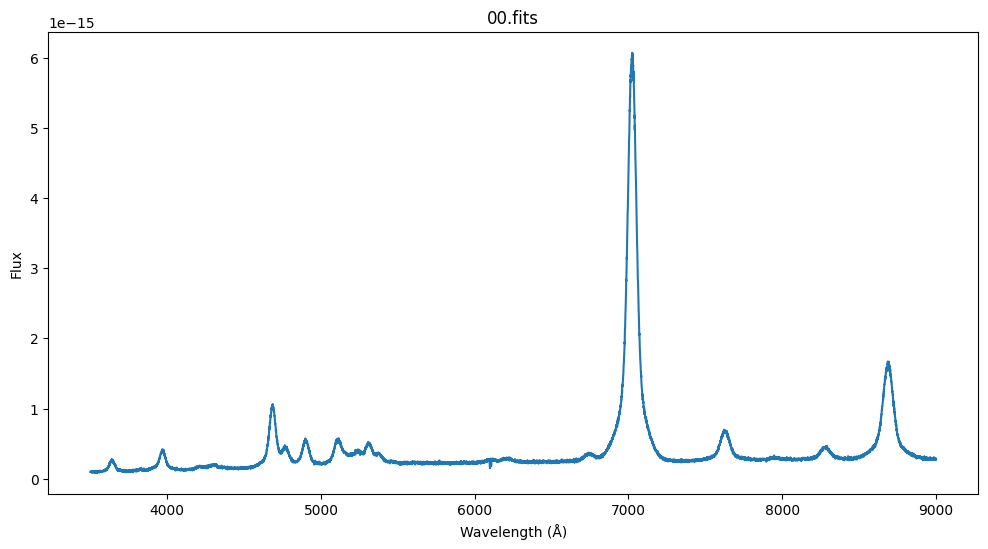


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 01.fits


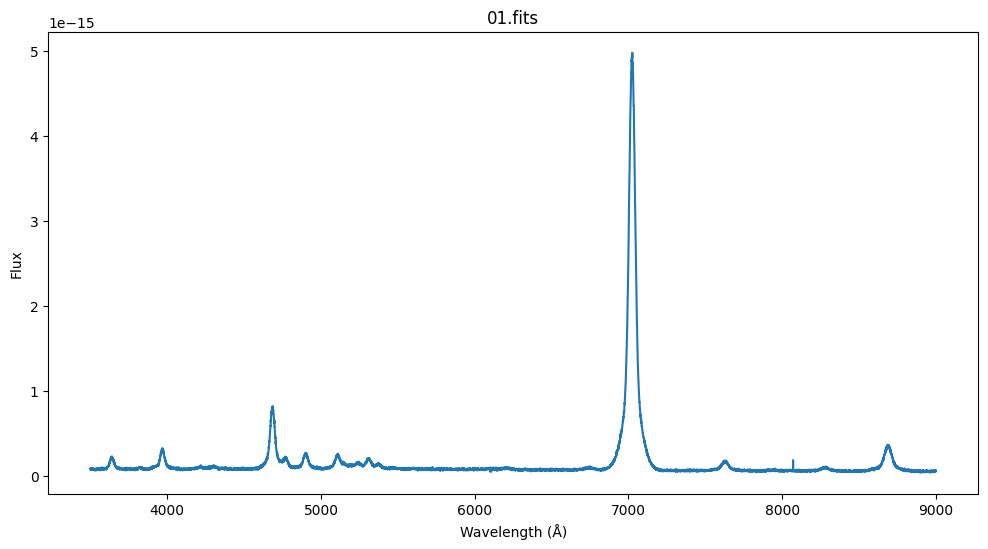


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 02.fits


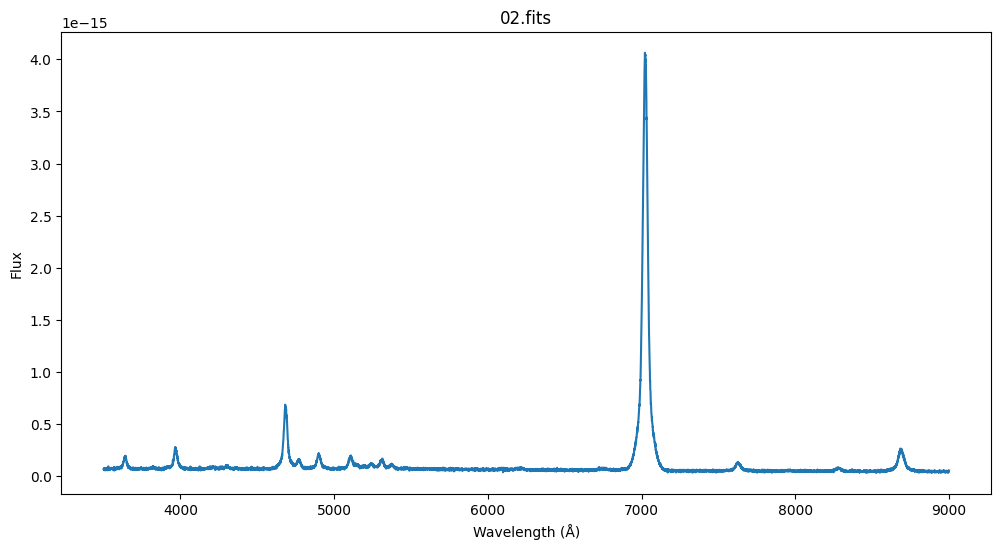


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 03.fits


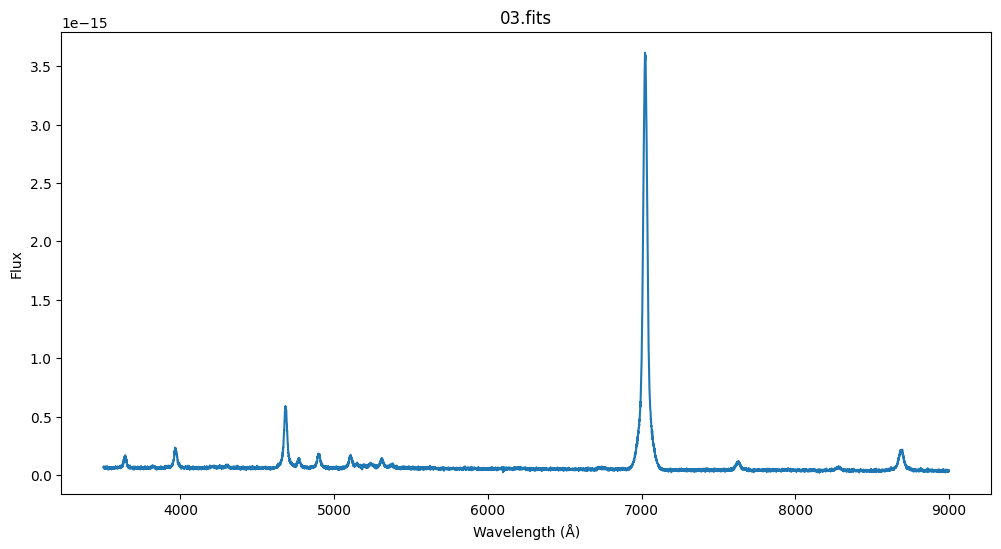


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 04.fits


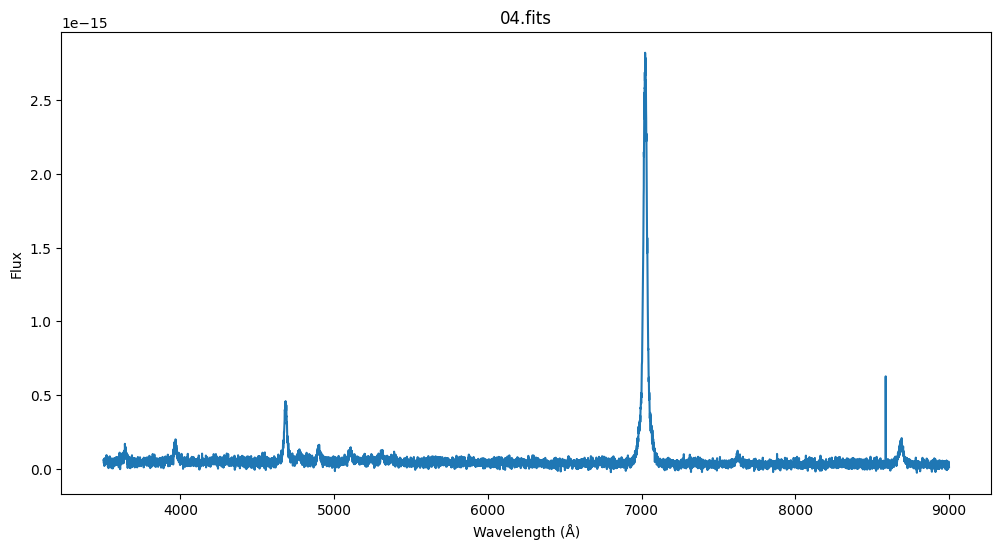


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 05.fits


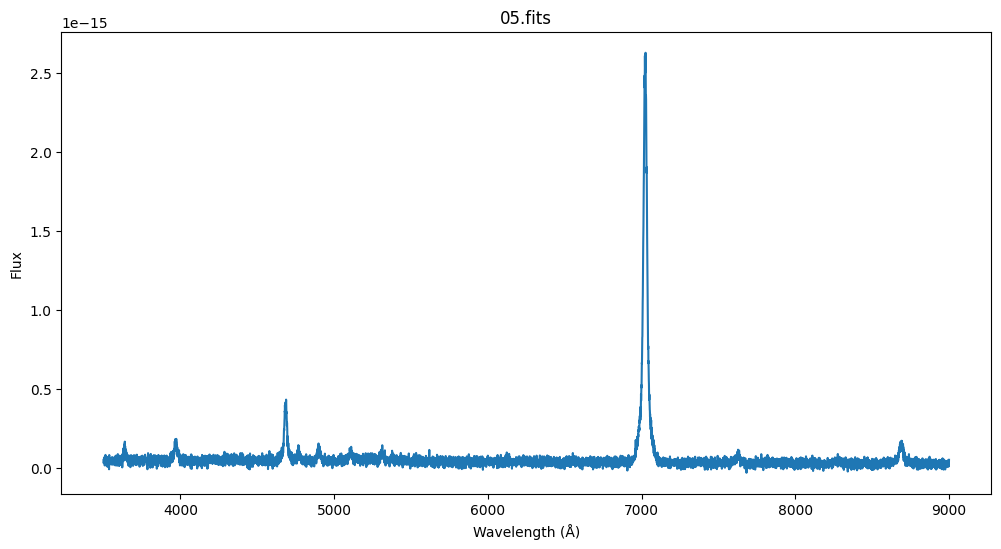


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 06.fits


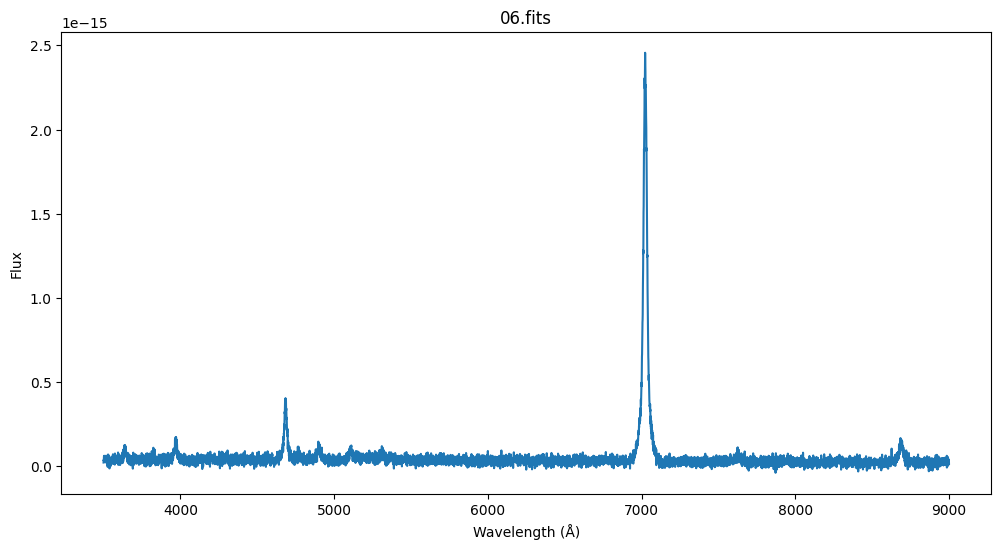


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 07.fits


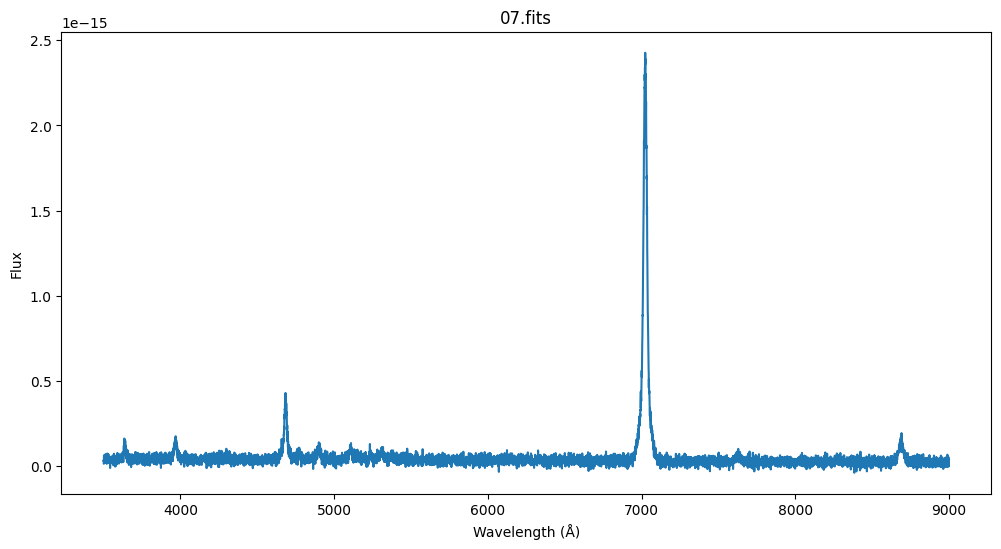


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 08.fits


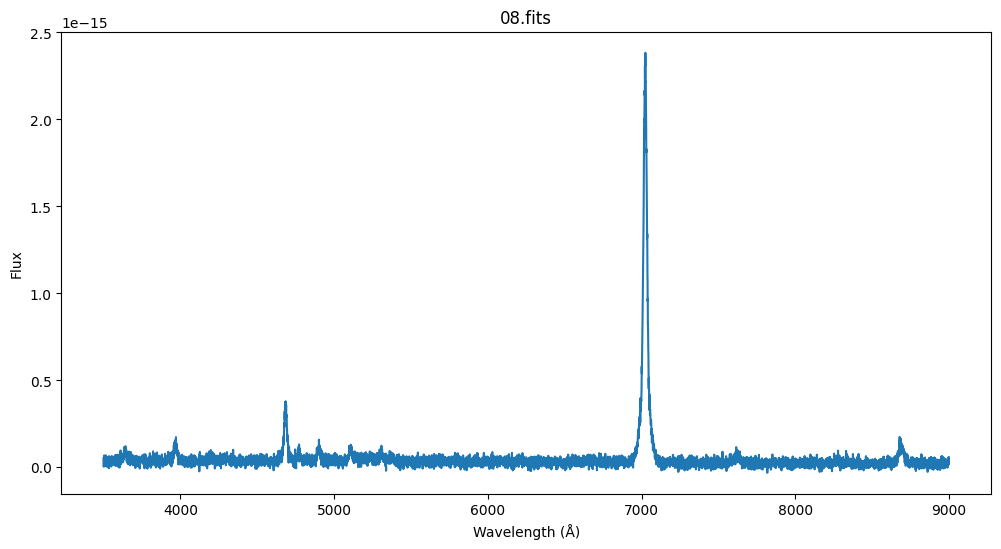


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 09.fits


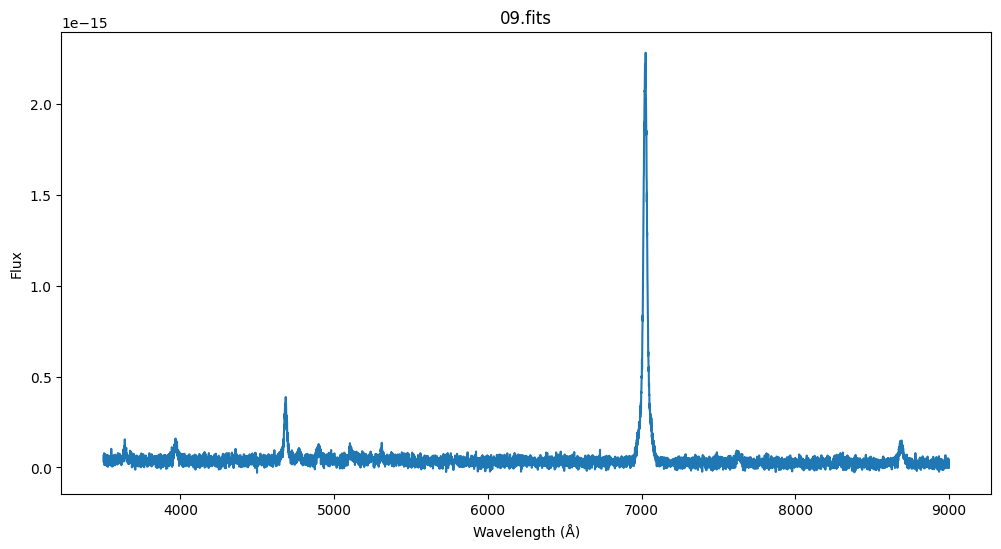


Identified Lines Summary:
  No lines were identified interactively.


In [3]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

# --- Spectroscopy ---
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"
# --- Merged spec files ---
merged_spec_files = [f for f in os.listdir(wd) if f.endswith('.fits') and not f.startswith('spec_')]
merged_spec_files.sort()

# --- Load Table 3 from Appendix C ---
data = {
    'Line ID': ['H I (He)', 'He I', 'H I (Hd)', 'He I', 'Fe II (28)', 'C III', 'He II', 'Fe II (27)', 'C III', 'Fe II (28)', 'Fe II (27)', 'H I (Hy)','Fe II (27)','Fe II (27)','He I','Fe II (27)','He I','He I','Fe II (37)','Fe II (38)','Fe II (37)','N III (3)','Fe II (38)','He II','Fe II (38)','Fe II (37)','Fe II (38)','N V (1)','Fe II (37)','N III','He II','He I','H I (Hb)','He I','Fe II (42)','N V (1)','N II (24)','He I','Fe II (42)','He I','Fe II (42)','Fe II (49)','Fe II (49)','Fe II (48)','O VI (1)','Fe II (48)','He II','Fe II (49, 48)','N II (29)','Fe II (55)','N II (3)','He I','Na I (D2)','Na I (D1)','N II (28)','Si II (4)','Si II (4)','Fe II (46)','Fe II (46)','Fe II (74)','Fe II (74)','He II','Si II (2)','Si II (2)','Fe II (74)','Fe II (74)','N II (8)','H I (Ha)','He I','He II','O I (21)','He I','He II','Fe II (73)','N I (3)','Fe II (73)','O I (55)','He II','N IV','Fe II (73)','O I (1)','N I'],
    'λ [Å] Spectral Class': [3970,4026,4102,4144,4179,4187,4200,4233,4267,4297,4303,4340,4352,4385,4388,4417,4438,4471,4491,4508,4515,4517,4523,4542,4549,4556,4584,4609,4629,4638,4686,4713,4861,4922,4924,4945,5001,5016,5018,5048,5169,5198,5235,5265,5276,5292,5317,5363,5412,5425,5479,5535,5679,5876,5890,5896,5938,5958,5979,5991,6084,6148,6248,6311,6347,6371,6417,6456,6482,6563,6678,6683,6891,7002,7065,7178,7281,7308,7452,7462,7477,7593,7703,7712,7773,7904],
    'Line ID.1': ['x','x','x','','x','','x','x','x','x','x','x','x','x','','x','','x','x','x','x','x','x','x','x','x','x','x','x','','x','x','x','x','x','x','x','x','x','x','','x','x','x','x','x','','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','',''],
    'λ [Å] Spectral Class.1': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
    'Line ID.2': ['Fe II','He/N','Fe II','He/N','Fe II','He/N','He/N','Fe II','He/N','Fe II','Fe II','He/N','Fe II','Fe II','He/N','Fe II','He/N','He/N','Fe II','Fe II','Fe II','He/N','Fe II','He/N','Fe II','Fe II','Fe II','He/N','Fe II','He/N','He/N','He/N','He/N','He/N','Fe II','He/N','He/N','He/N','Fe II','He/N','Fe II','Fe II','Fe II','Fe II','He/N','Fe II','He/N','Fe II','He/N','Fe II','He/N','He/N','He/N','He/N','He/N','He/N','Fe II','Fe II','Fe II','Fe II','He/N','He/N','He/N','Fe II','Fe II','He/N','He/N','He/N','He/N','He/N','He/N','Fe II','He/N','Fe II','He/N','He/N','He/N','Fe II','He/N','Fe II','He/N','He/N'],
    'λ [Å] Spectral Class.2': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
}

# Fill shorter lists with '-' to make them the same length
max_len = max(len(data[key]) for key in data)
for key in data:
    data[key] += ['-'] * (max_len - len(data[key]))
table3 = pd.DataFrame(data)

# --- Function to plot and interactively identify lines ---
def identify_lines(wavelength, flux, title, table3):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(wavelength, flux)
    ax.set_title(title)
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Flux")

    identified_lines = []

    def onclick(event):
        if event.xdata is not None:
            wavelength_click = event.xdata
            print(f"Clicked wavelength: {wavelength_click:.2f} Å")

            # Search Table 3 for matching lines
            matches = table3[
                (table3['λ [Å] Spectral Class'] > wavelength_click - 10) &
                (table3['λ [Å] Spectral Class'] < wavelength_click + 10)
            ]

            if not matches.empty:
                print("Possible matching lines:")
                print(matches)

                identified_lines.append(
                    {"wavelength": wavelength_click, "identifications": matches}
                )
                ax.axvline(x=wavelength_click, color='r', linestyle='--')
                plt.draw()
            else:
                print("No matching lines found in Table 3.")

    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

    return identified_lines

# --- Main loop to process all spectra ---
for f in merged_spec_files:
  path = os.path.join(wd, f)
  try:
      with fits.open(path) as file:
          flux = file[0].data
          if flux.dtype.byteorder == '>':
              flux = flux.byteswap().view(flux.dtype.newbyteorder('<'))
          hdr = file[0].header
          print(f"\nExploring: {f}")
          n_pix = len(flux)

          # Wavelength Calibration (replace with your actual calibration if available)
          wavelength = np.linspace(3500, 9000, n_pix)  # Example linear dispersion

          # Identify lines interactively
          identified_lines_result = identify_lines(wavelength, flux, title=f"{f}", table3=table3)

          # --- Classify the nova (based on identified lines) ---
          print("\nIdentified Lines Summary:")
          if identified_lines_result:
              he_n_lines = 0
              fe_ii_lines = 0
              for line_info in identified_lines_result:
                  print(f"  Wavelength: {line_info['wavelength']:.2f} Å")
                  print(f"  Possible Identifications:\n{line_info['identifications']}")

                  # Count He/N and Fe II lines
                  for _, row in line_info['identifications'].iterrows():
                      if "He/N" in row['Line ID.2']:
                          he_n_lines += 1
                      if "Fe II" in row['Line ID.2']:
                          fe_ii_lines += 1

              # Determine the nova class based on the majority of identified lines
              if he_n_lines > fe_ii_lines:
                  nova_class = "He/N"
              elif fe_ii_lines > he_n_lines:
                  nova_class = "Fe II"
              else:
                  nova_class = "Unknown"  # Or handle cases with no clear classification
              print(f"\nBased on the identified lines, the nova is likely of class: {nova_class}")

          else:
              print("  No lines were identified interactively.")

  except Exception as e:
      print(f"Error with {f}: {e}")


Exploring: 00.fits


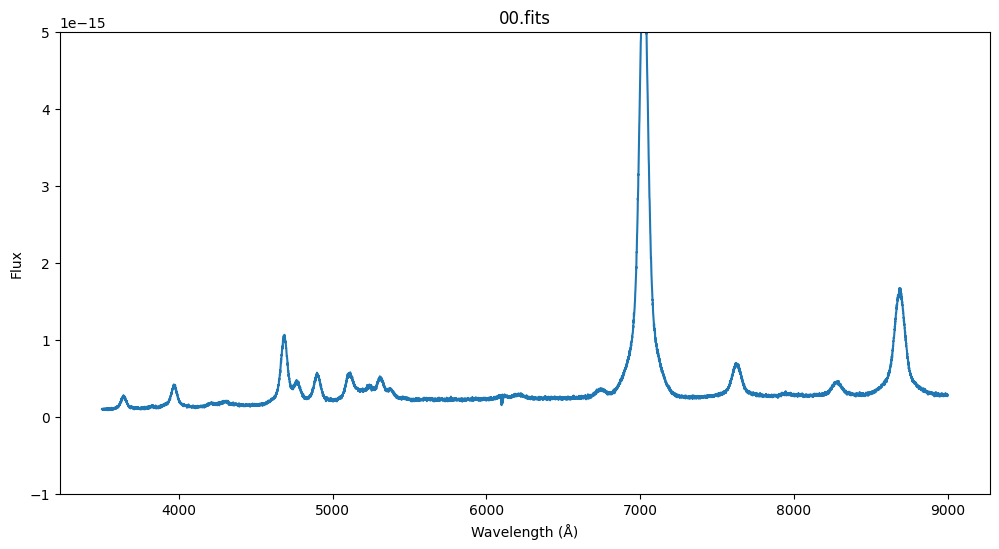


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 01.fits


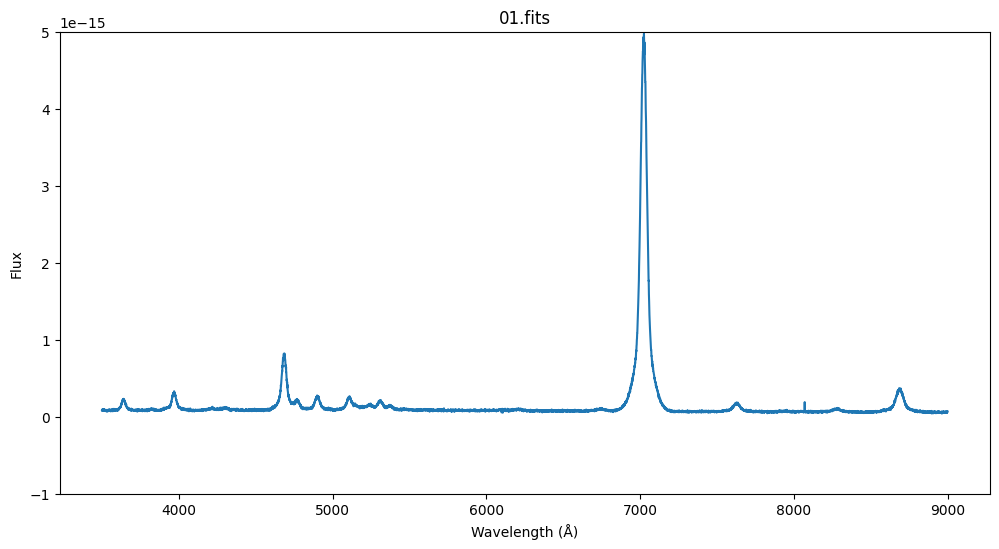


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 02.fits


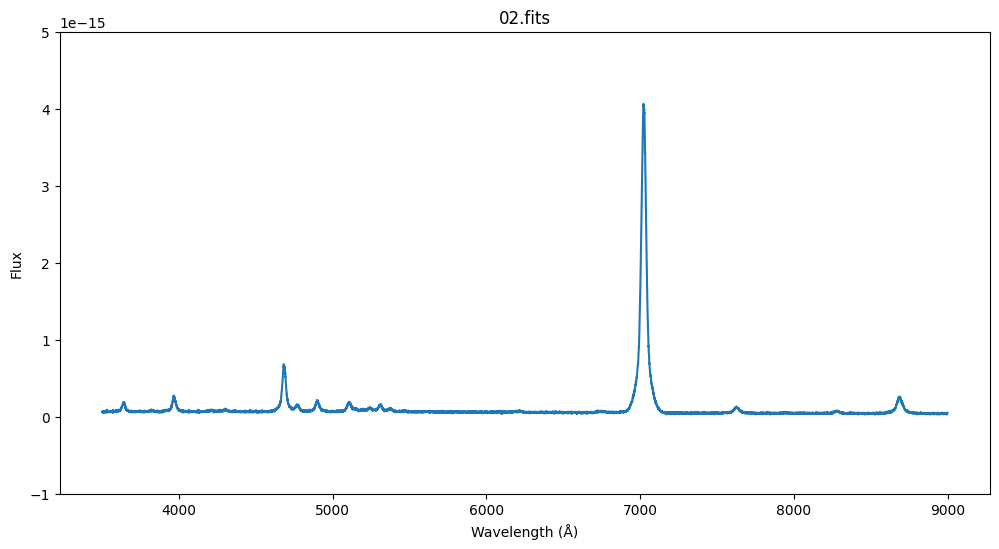


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 03.fits


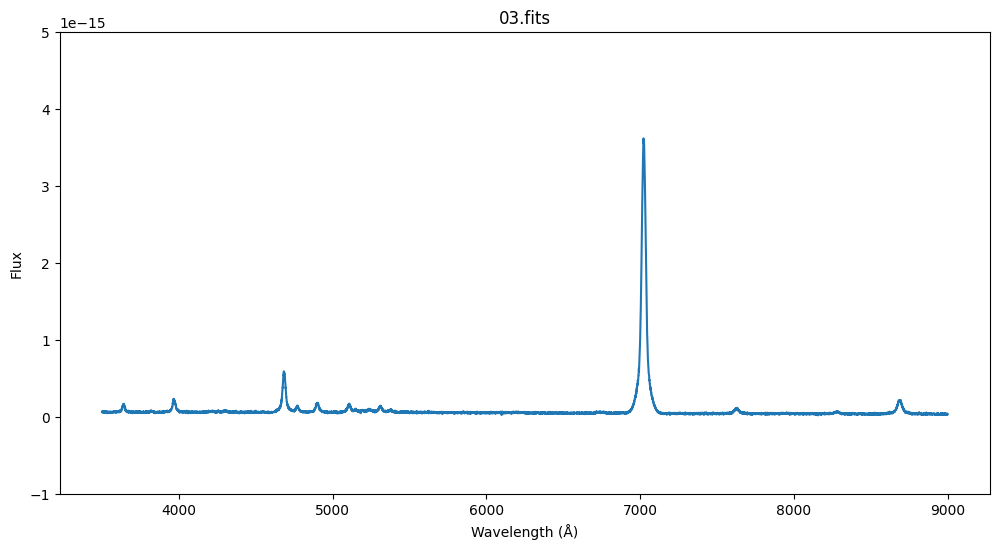


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 04.fits


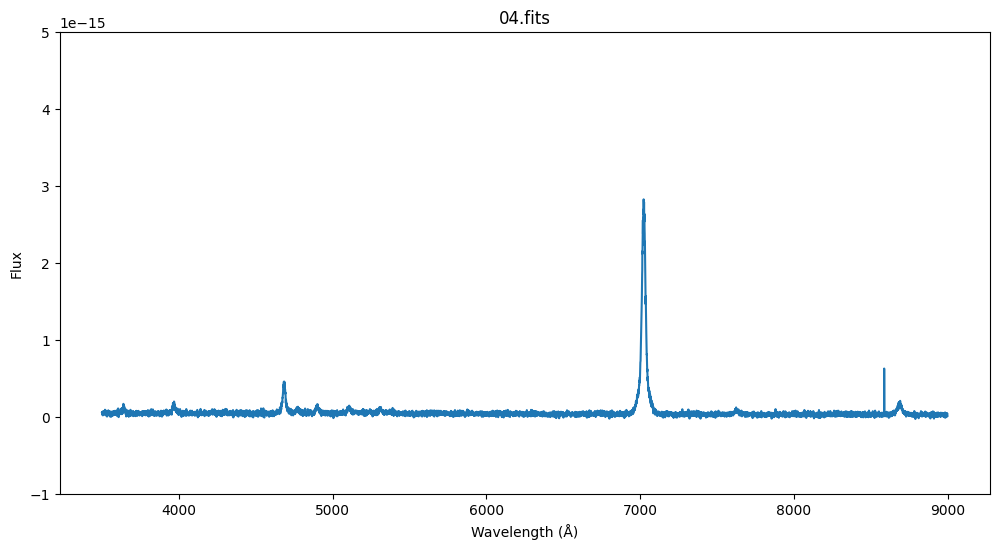


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 05.fits


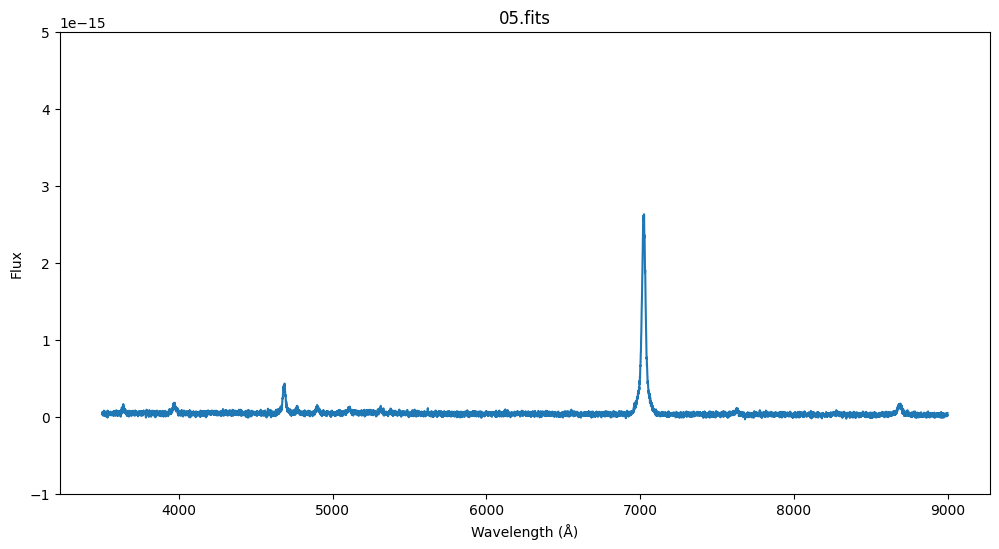


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 06.fits


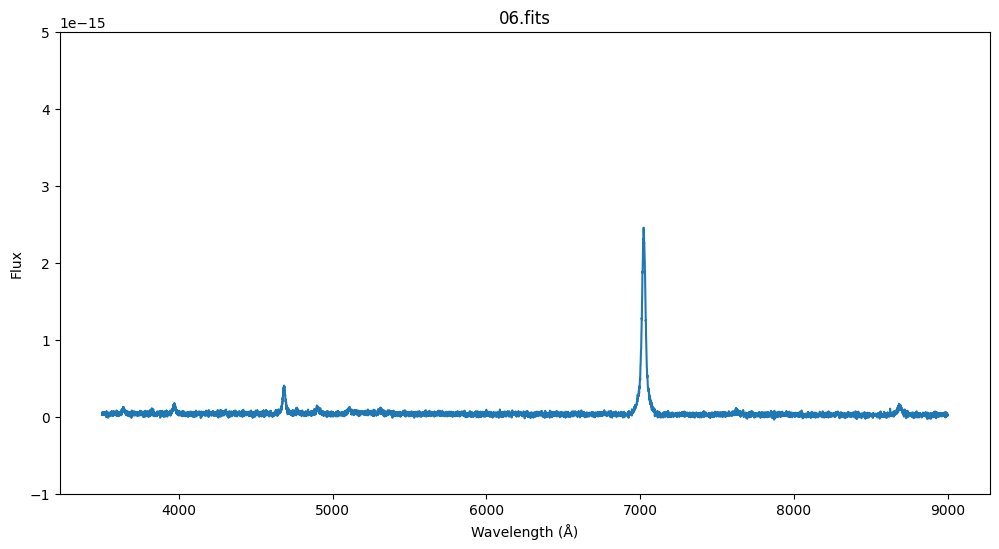


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 07.fits


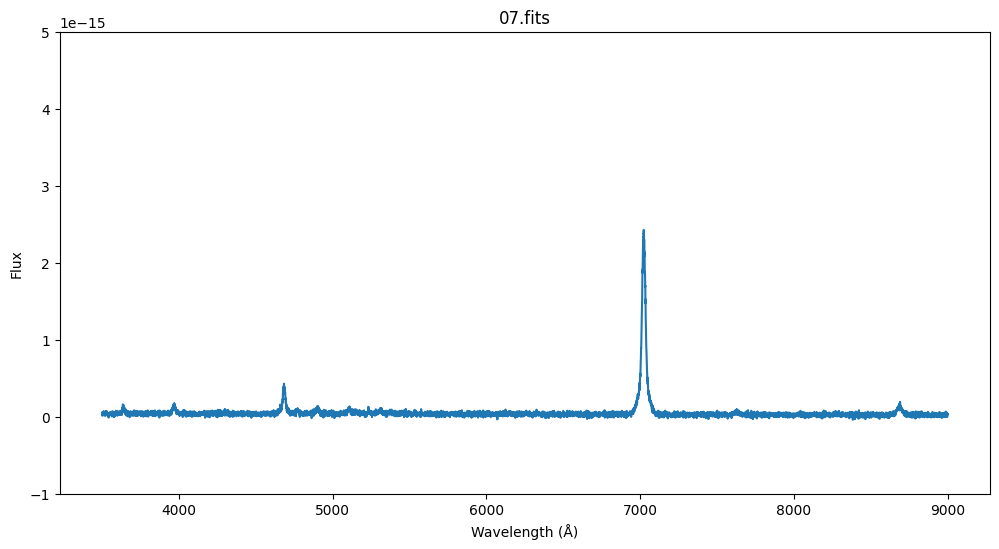


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 08.fits


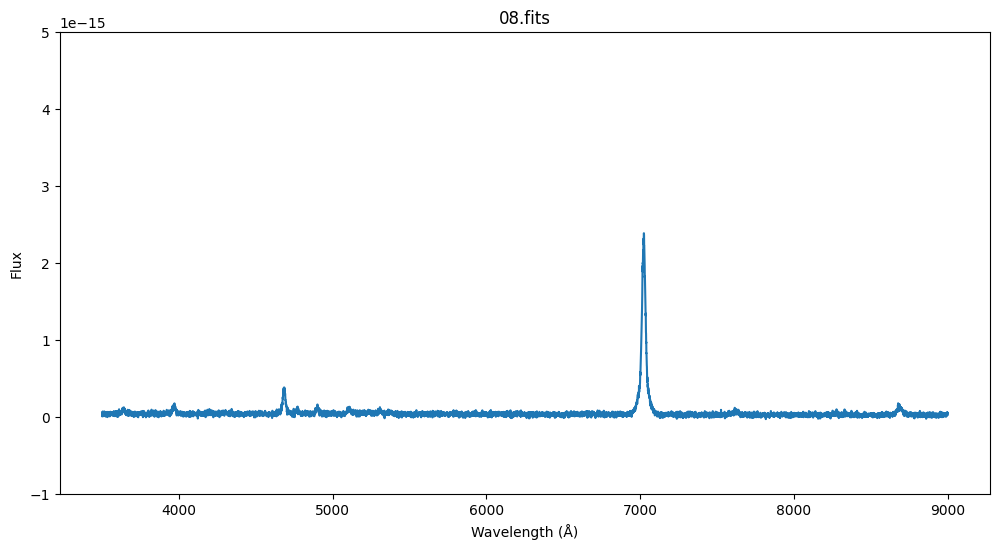


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 09.fits


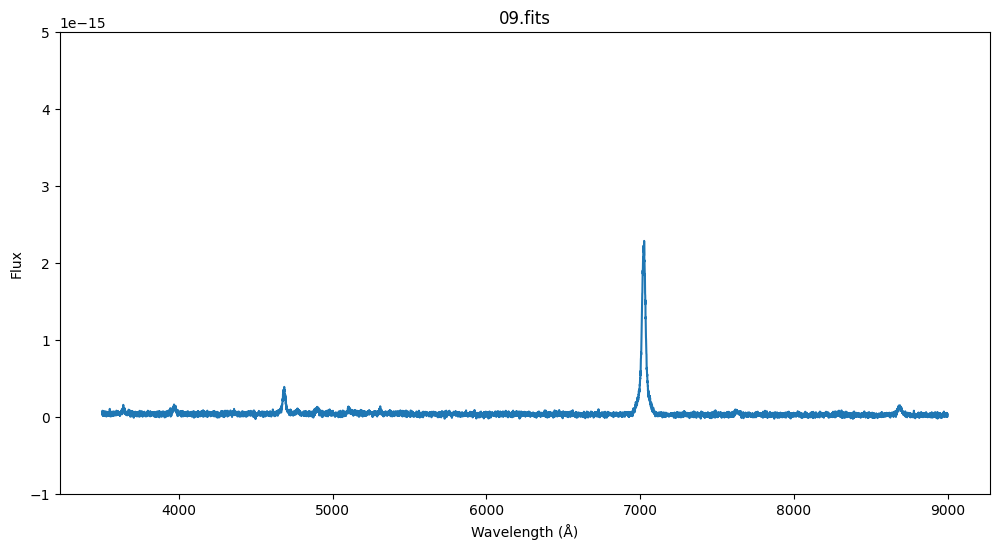


Identified Lines Summary:
  No lines were identified interactively.


In [4]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

# --- Spectroscopy ---
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"  # **CHANGE THIS TO YOUR ACTUAL DIRECTORY**
# --- Merged spec files ---
merged_spec_files = [
    f
    for f in os.listdir(wd)
    if f.endswith(".fits") and not f.startswith("spec_")
]
merged_spec_files.sort()

# --- Load Table 3 from Appendix C ---
# --- Load Table 3 from Appendix C ---
data = {
    "Line ID": [
        "H I (He)",
        "He I",
        "H I (Hd)",
        "He I",
        "Fe II (28)",
        "C III",
        "He II",
        "Fe II (27)",
        "C III",
        "Fe II (28)",
        "Fe II (27)",
        "H I (Hy)",
        "Fe II (27)",
        "Fe II (27)",
        "He I",
        "Fe II (27)",
        "He I",
        "He I",
        "Fe II (37)",
        "Fe II (38)",
        "Fe II (37)",
        "N III (3)",
        "Fe II (38)",
        "He II",
        "Fe II (38)",
        "Fe II (37)",
        "Fe II (38)",
        "N V (1)",
        "Fe II (37)",
        "N III",
        "He II",
        "He I",
        "H I (Hb)",
        "He I",
        "Fe II (42)",
        "N V (1)",
        "N II (24)",
        "He I",
        "Fe II (42)",
        "He I",
        "Fe II (42)",
        "Fe II (49)",
        "Fe II (49)",
        "Fe II (48)",
        "O VI (1)",
        "Fe II (48)",
        "He II",
        "Fe II (49, 48)",
        "N II (29)",
        "Fe II (55)",
        "N II (3)",
        "He I",
        "Na I (D2)",
        "Na I (D1)",
        "N II (28)",
        "Si II (4)",
        "Si II (4)",
        "Fe II (46)",
        "Fe II (46)",
        "Fe II (74)",
        "Fe II (74)",
        "He II",
        "Si II (2)",
        "Si II (2)",
        "Fe II (74)",
        "Fe II (74)",
        "N II (8)",
        "H I (Ha)",
        "He I",
        "He II",
        "O I (21)",
        "He I",
        "He II",
        "Fe II (73)",
        "N I (3)",
        "Fe II (73)",
        "O I (55)",
        "He II",
        "N IV",
        "Fe II (73)",
        "O I (1)",
        "N I",
    ],
    "λ [Å] Spectral Class": [
        3970,
        4026,
        4102,
        4144,
        4179,
        4187,
        4200,
        4233,
        4267,
        4297,
        4303,
        4340,
        4352,
        4385,
        4388,
        4417,
        4438,
        4471,
        4491,
        4508,
        4515,
        4517,
        4523,
        4542,
        4549,
        4556,
        4584,
        4609,
        4629,
        4638,
        4686,
        4713,
        4861,
        4922,
        4924,
        4945,
        5001,
        5016,
        5018,
        5048,
        5169,
        5198,
        5235,
        5265,
        5276,
        5292,
        5317,
        5363,
        5412,
        5425,
        5479,
        5535,
        5679,
        5876,
        5890,
        5896,
        5938,
        5958,
        5979,
        5991,
        6084,
        6148,
        6248,
        6311,
        6347,
        6371,
        6417,
        6456,
        6482,
        6563,
        6678,
        6683,
        6891,
        7002,
        7065,
        7178,
        7281,
        7308,
        7452,
        7462,
        7477,
        7593,
        7703,
        7712,
        7773,
        7904,
    ],
    "Line ID.1": [
        "x",
        "x",
        "x",
        "",
        "x",
        "",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "",
        "x",
        "",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "",
        "x",
        "x",
        "x",
        "x",
        "x",
        "",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "x",
        "",
    ],
    "λ [Å] Spectral Class.1": [
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
    ],
    "Line ID.2": [
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "Fe II",
        "He/N",
        "Fe II",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "Fe II",
        "Fe II",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "Fe II",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "Fe II",
        "Fe II",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "Fe II",
        "Fe II",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
        "He/N",
        "Fe II",
        "He/N",
        "Fe II",
        "He/N",
        "He/N",
    ],
    "λ [Å] Spectral Class.2": [
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
        "-",
    ],
}

# Fill shorter lists with '-' to make them the same length
# (This part will be needed once you add the table data)
max_len = max(len(data[key]) for key in data)
for key in data:
   data[key] += ["-"] * (max_len - len(data[key]))

table3 = pd.DataFrame(data)

# --- Function to plot and interactively identify lines ---
def identify_lines(wavelength, flux, title, table3):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(wavelength, flux)
    ax.set_title(title)
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Flux")

    # Add y-axis limits here:
    ax.set_ylim(-1e-15, 5e-15)  # Adjust these values as needed

    identified_lines = []

    def onclick(event):
        if event.xdata is not None:
            wavelength_click = event.xdata
            print(f"Clicked wavelength: {wavelength_click:.2f} Å")

            # Search Table 3 for matching lines
            matches = table3[
                (table3["λ [Å] Spectral Class"] > wavelength_click - 10)
                & (table3["λ [Å] Spectral Class"] < wavelength_click + 10)
            ]

            if not matches.empty:
                print("Possible matching lines:")
                print(matches)

                identified_lines.append(
                    {"wavelength": wavelength_click, "identifications": matches}
                )
                ax.axvline(x=wavelength_click, color="r", linestyle="--")
                plt.draw()
            else:
                print("No matching lines found in Table 3.")

    fig.canvas.mpl_connect("button_press_event", onclick)
    plt.show()

    return identified_lines


# --- Main loop to process all spectra ---
for f in merged_spec_files:
    path = os.path.join(wd, f)
    try:
        with fits.open(path) as file:
            flux = file[0].data
            if flux.dtype.byteorder == ">":
                flux = flux.byteswap().view(flux.dtype.newbyteorder("<"))
            hdr = file[0].header
            print(f"\nExploring: {f}")
            n_pix = len(flux)

            # Wavelength Calibration (replace with your actual calibration if available)
            wavelength = np.linspace(3500, 9000, n_pix)  # Example linear dispersion

            # Identify lines interactively
            identified_lines_result = identify_lines(
                wavelength, flux, title=f"{f}", table3=table3
            )

            # --- Classify the nova (based on identified lines) ---
            print("\nIdentified Lines Summary:")
            if identified_lines_result:
                he_n_lines = 0
                fe_ii_lines = 0
                for line_info in identified_lines_result:
                    print(f"  Wavelength: {line_info['wavelength']:.2f} Å")
                    print(f"  Possible Identifications:\n{line_info['identifications']}")

                    # Count He/N and Fe II lines
                    # (You will need to modify this part once you add the table data)
                    for _, row in line_info["identifications"].iterrows():
                        if "He/N" in row["Line ID.2"]: #Modify this according to your table
                            he_n_lines += 1
                        if "Fe II" in row["Line ID.2"]: #Modify this according to your table
                            fe_ii_lines += 1

                # Determine the nova class based on the majority of identified lines
                # (You might need to adjust the logic here based on your table data)
                if he_n_lines > fe_ii_lines:
                    nova_class = "He/N"
                elif fe_ii_lines > he_n_lines:
                    nova_class = "Fe II"
                else:
                    nova_class = (
                        "Unknown"
                    )  # Or handle cases with no clear classification
                print(
                    f"\nBased on the identified lines, the nova is likely of class: {nova_class}"
                )

            else:
                print("  No lines were identified interactively.")

    except Exception as e:
        print(f"Error with {f}: {e}")


Exploring: 00.fits


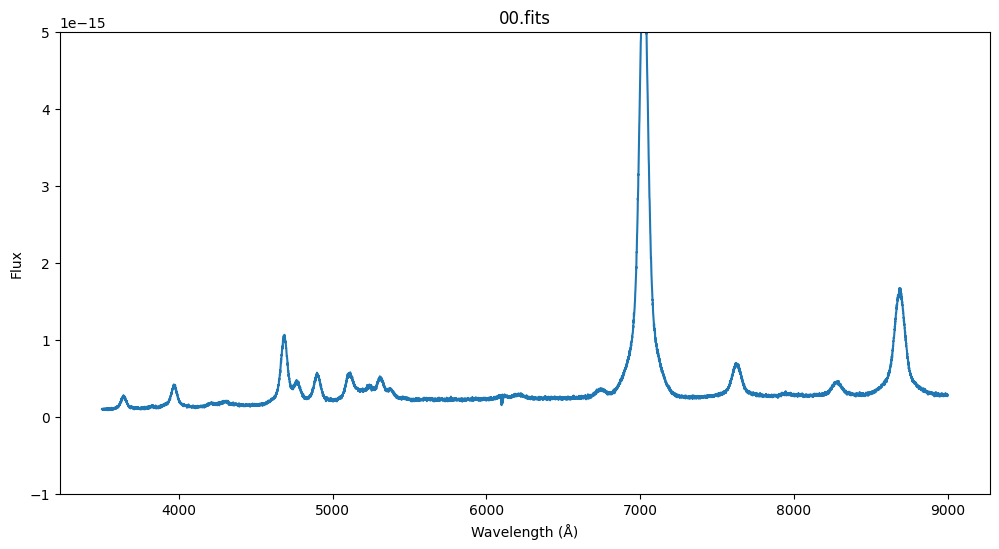


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 01.fits


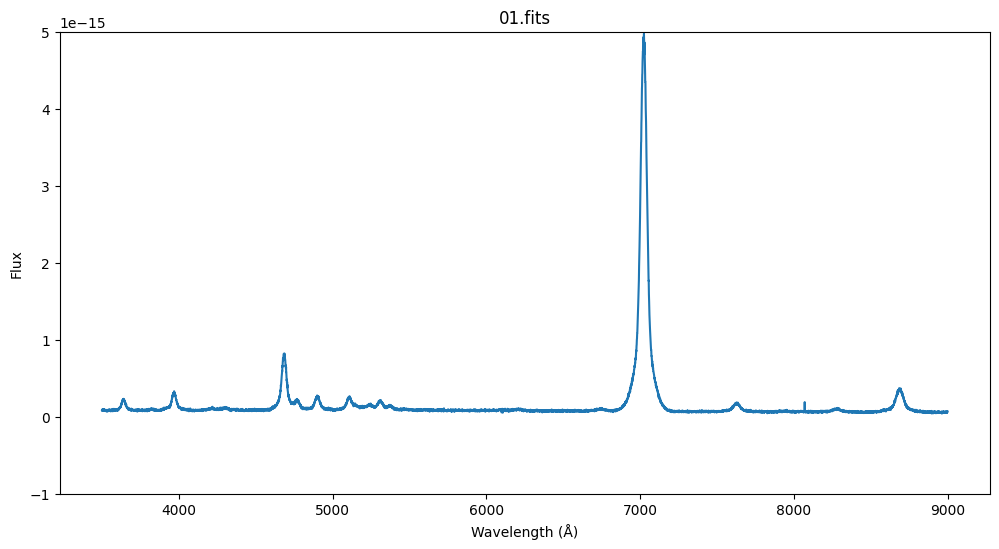


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 02.fits


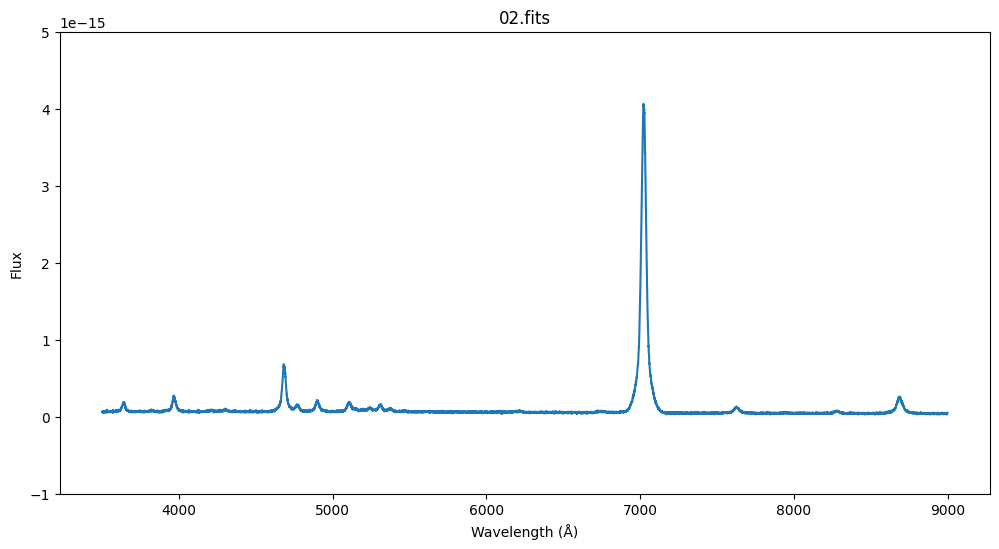


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 03.fits


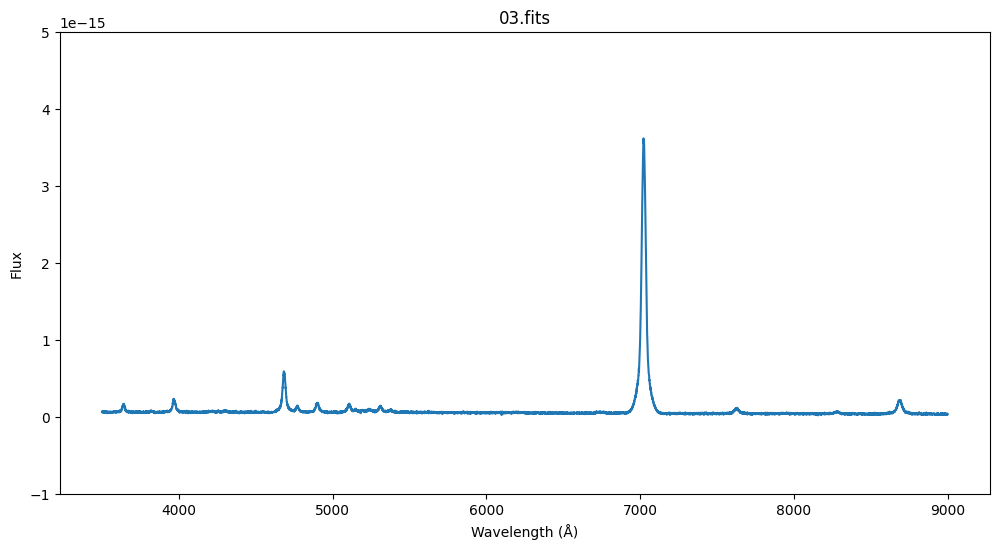


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 04.fits


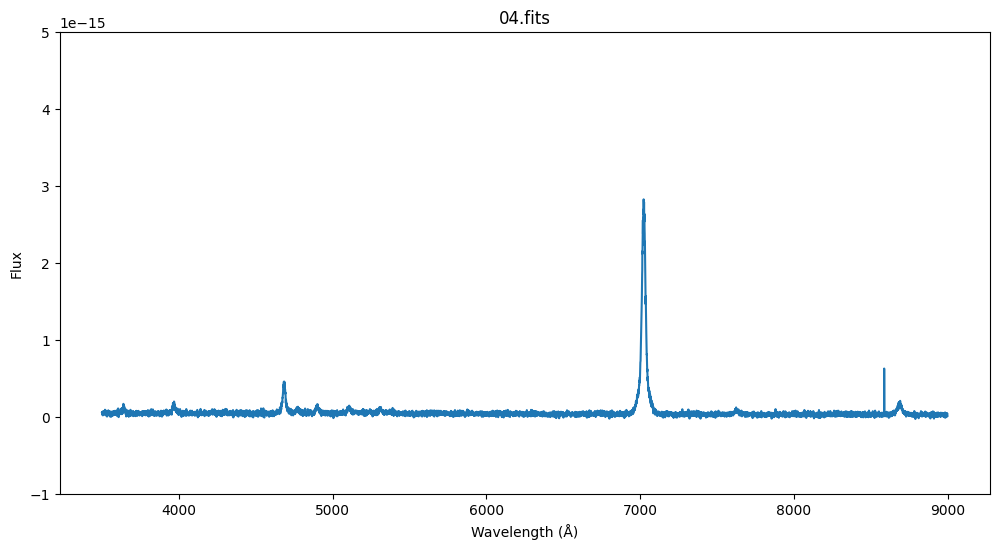


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 05.fits


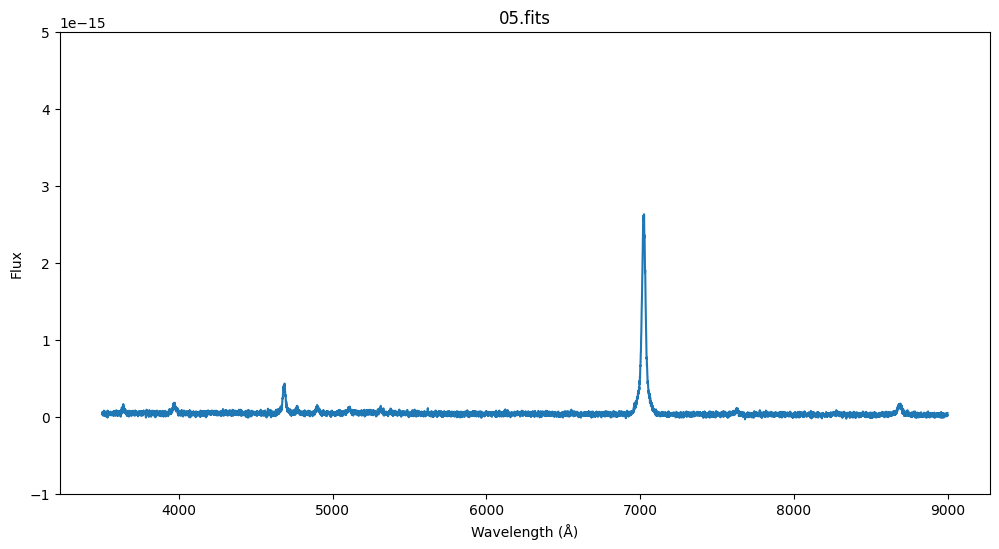


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 06.fits


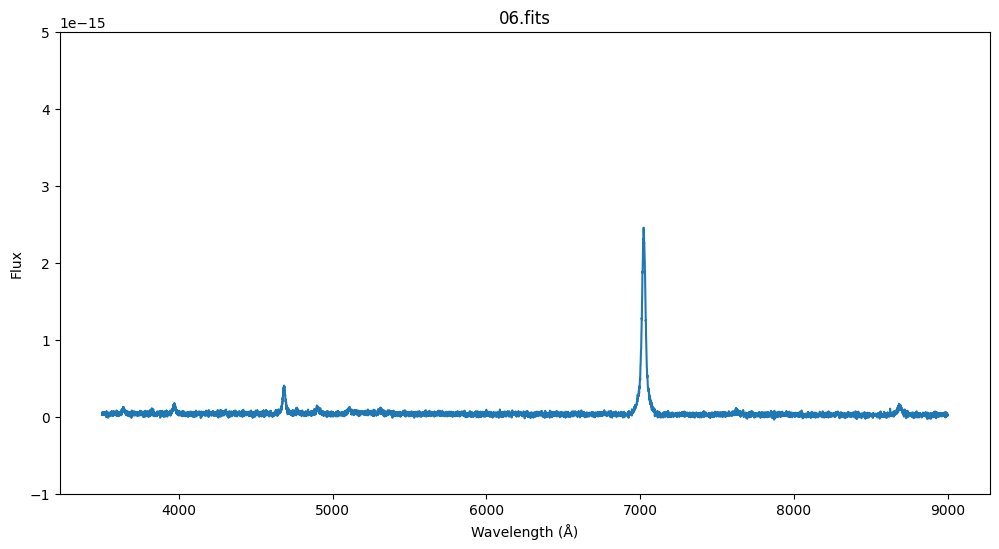


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 07.fits


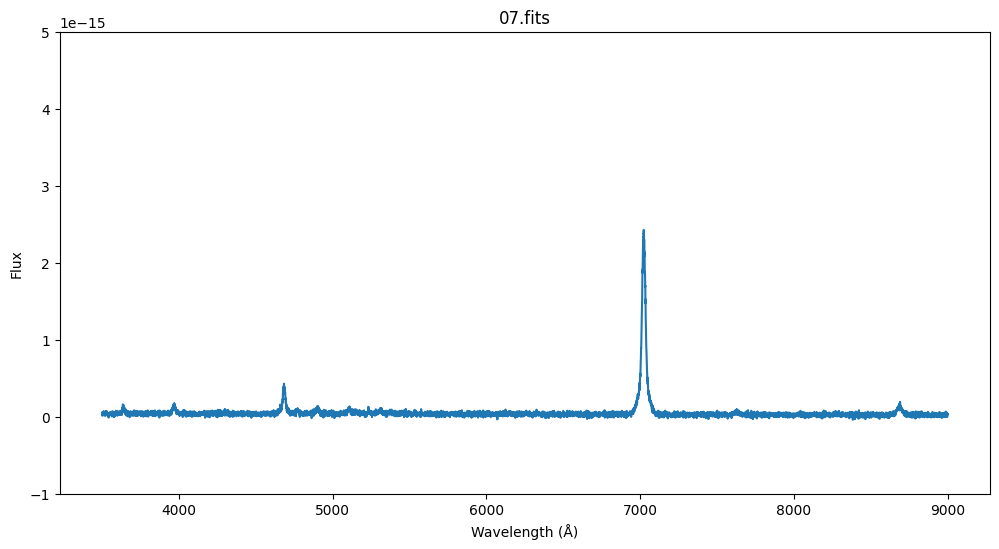


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 08.fits


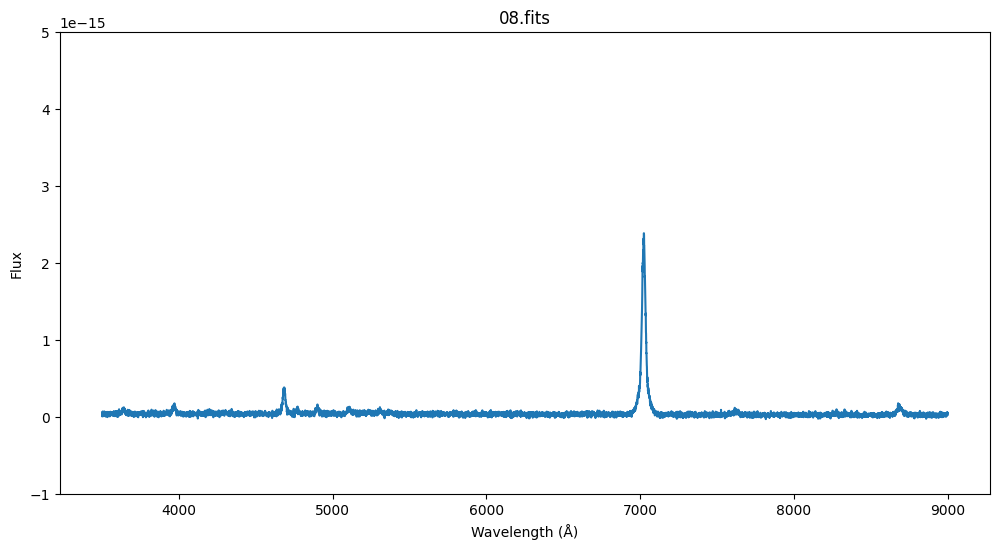


Identified Lines Summary:
  No lines were identified interactively.

Exploring: 09.fits


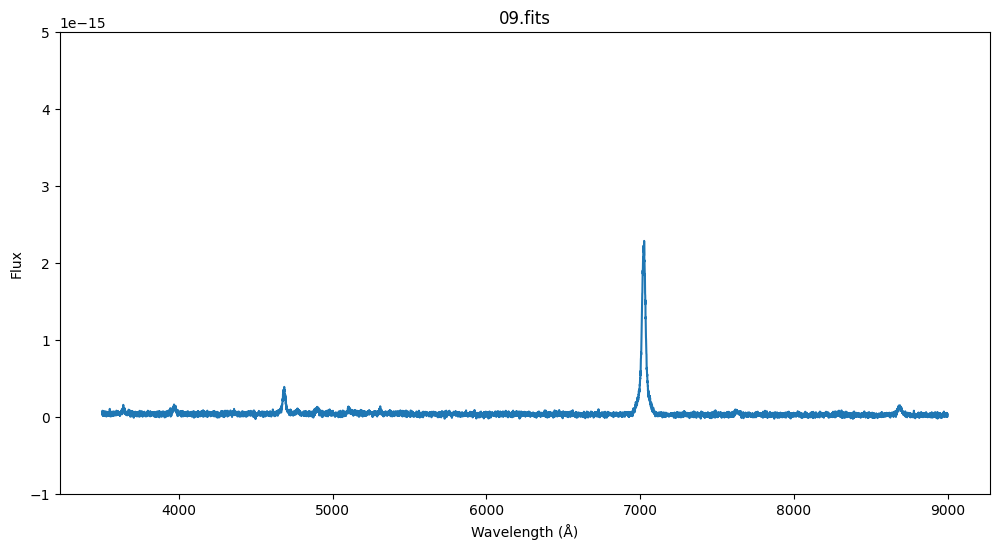


Identified Lines Summary:
  No lines were identified interactively.


In [6]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

# --- Spectroscopy Data Directory ---
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"  # **CHANGE THIS TO YOUR ACTUAL DIRECTORY**

# --- Merged spec files ---
merged_spec_files = [
    f
    for f in os.listdir(wd)
    if f.endswith(".fits") and not f.startswith("spec_")
]
merged_spec_files.sort()

# --- Load Table 3 (Finding List for Optical Emission Lines) ---
data = {
    "Line ID": [
        "H I (He)", "He I", "H I (Hd)", "He I", "Fe II (28)", "C III", "He II",
        "Fe II (27)", "C III", "Fe II (28)", "Fe II (27)", "H I (Hy)", "Fe II (27)",
        "Fe II (27)", "He I", "Fe II (27)", "He I", "He I", "Fe II (37)", "Fe II (38)",
        "Fe II (37)", "N III (3)", "Fe II (38)", "He II", "Fe II (38)", "Fe II (37)",
        "Fe II (38)", "N V (1)", "Fe II (37)", "N III", "He II", "He I", "H I (Hb)",
        "He I", "Fe II (42)", "N V (1)", "N II (24)", "He I", "Fe II (42)", "He I",
        "Fe II (42)", "Fe II (49)", "Fe II (49)", "Fe II (48)", "O VI (1)", "Fe II (48)",
        "He II", "Fe II (49, 48)", "N II (29)", "Fe II (55)", "N II (3)", "He I",
        "Na I (D2)", "Na I (D1)", "N II (28)", "Si II (4)", "Si II (4)", "Fe II (46)",
        "Fe II (46)", "Fe II (74)", "Fe II (74)", "He II", "Si II (2)", "Si II (2)",
        "Fe II (74)", "Fe II (74)", "N II (8)", "H I (Ha)", "He I", "He II", "O I (21)",
        "He I", "He II", "Fe II (73)", "N I (3)", "Fe II (73)", "O I (55)", "He II",
        "N IV", "Fe II (73)", "O I (1)", "N I"
    ],
    "λ [Å]": [
        3970, 4026, 4102, 4144, 4179, 4187, 4200, 4233, 4267, 4297, 4303, 4340, 4352,
        4385, 4388, 4417, 4438, 4471, 4491, 4508, 4515, 4517, 4523, 4542, 4549, 4556,
        4584, 4609, 4629, 4638, 4686, 4713, 4861, 4922, 4924, 4945, 5001, 5016, 5018,
        5048, 5169, 5198, 5235, 5265, 5276, 5292, 5317, 5363, 5412, 5425, 5479, 5535,
        5679, 5876, 5890, 5896, 5938, 5958, 5979, 5991, 6084, 6148, 6248, 6311, 6347,
        6371, 6417, 6456, 6482, 6563, 6678, 6683, 6891, 7002, 7065, 7178, 7281, 7308,
        7452, 7462, 7477, 7593, 7703, 7712, 7773, 7904
    ],
    "Spectral Class Fe II": [
        "x", "", "", "", "x", "", "", "x", "", "x", "x", "x", "x", "x", "", "x", "", "",
        "x", "x", "x", "", "x", "", "x", "x", "x", "", "x", "", "", "", "x", "", "x",
        "", "", "", "x", "", "x", "x", "x", "x", "", "x", "", "x", "", "x", "", "",
        "", "", "", "", "", "", "x", "x", "x", "x", "", "", "", "x", "x", "", "",
        "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""
    ],
    "Spectral Class He/N": [
        "", "x", "", "x", "", "", "x", "", "x", "", "", "", "", "", "x", "", "x", "x",
        "", "", "", "x", "", "x", "", "", "", "", "", "x", "x", "x", "x", "x", "",
        "", "x", "", "", "x", "", "", "", "", "x", "", "", "", "x", "", "", "x", "x",
        "x", "x", "x", "x", "", "", "", "", "x", "x", "x", "", "", "x", "x", "x",
        "x", "x", "x", "", "x", "", "x", "x", "x", "", "", "", "", ""
    ]
}
max_len = max(len(data[key]) for key in data)
for key in data:
   data[key] += ["-"] * (max_len - len(data[key]))

table3 = pd.DataFrame(data)

# --- Function to plot and interactively identify lines ---
def identify_lines(wavelength, flux, title, table3):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(wavelength, flux)
    ax.set_title(title)
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Flux")

    # Add y-axis limits here:
    ax.set_ylim(-1e-15, 5e-15)  # Adjust these values as needed

    identified_lines = []

    def onclick(event):
        if event.xdata is not None:
            wavelength_click = event.xdata
            print(f"Clicked wavelength: {wavelength_click:.2f} Å")

            # Search Table 3 for matching lines within +/- 10 Å
            matches = table3[
                (table3["λ [Å]"] > wavelength_click - 10)
                & (table3["λ [Å]"] < wavelength_click + 10)
            ]

            if not matches.empty:
                print("Possible matching lines:")
                print(matches)

                identified_lines.append(
                    {"wavelength": wavelength_click, "identifications": matches}
                )
                ax.axvline(x=wavelength_click, color="r", linestyle="--")
                plt.draw()
            else:
                print("No matching lines found in Table 3 within +/- 10 Å.")

    fig.canvas.mpl_connect("button_press_event", onclick)
    plt.show()

    return identified_lines


# --- Main loop to process all spectra ---
for f in merged_spec_files:
    path = os.path.join(wd, f)
    try:
        with fits.open(path) as file:
            flux = file[0].data
            if flux.dtype.byteorder == ">":
                flux = flux.byteswap().view(flux.dtype.newbyteorder("<"))
            hdr = file[0].header
            print(f"\nExploring: {f}")
            n_pix = len(flux)

            # Wavelength Calibration (replace with your actual calibration if available)
            wavelength = np.linspace(3500, 9000, n_pix)  # Example linear dispersion

            # Identify lines interactively
            identified_lines_result = identify_lines(
                wavelength, flux, title=f"{f}", table3=table3
            )

            # --- Classify the nova (based on identified lines) ---
            print("\nIdentified Lines Summary:")
            if identified_lines_result:
                he_n_lines = 0
                fe_ii_lines = 0
                for line_info in identified_lines_result:
                    print(f"  Wavelength: {line_info['wavelength']:.2f} Å")
                    print(
                        f"  Possible Identifications:\n{line_info['identifications']}"
                    )

                    # Count He/N and Fe II lines
                    for _, row in line_info["identifications"].iterrows():
                        if row["Spectral Class He/N"] == "x":
                            he_n_lines += 1
                        if row["Spectral Class Fe II"] == "x":
                            fe_ii_lines += 1

                # Determine the nova class based on the majority of identified lines
                if he_n_lines > fe_ii_lines:
                    nova_class = "He/N"
                elif fe_ii_lines > he_n_lines:
                    nova_class = "Fe II"
                else:
                    nova_class = (
                        "Unknown"
                    )  # Or handle cases with no clear classification
                print(
                    f"\nBased on the identified lines, the nova is likely of class: {nova_class}"
                )

            else:
                print("  No lines were identified interactively.")

    except Exception as e:
        print(f"Error with {f}: {e}")